# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [16]:
# Set the API base URL
url="http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =url + "&q=" + city.replace(" ","+")

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | codrington
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | isafjordur
Processing Record 8 of Set 1 | coquimbo
Processing Record 9 of Set 1 | egilsstadir
Processing Record 10 of Set 1 | port saint john's
Processing Record 11 of Set 1 | badger
Processing Record 12 of Set 1 | luwuk
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | phan rang-thap cham
Processing Record 15 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 16 of Set 1 | puerto baquerizo moreno
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | karratha
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 o

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,georgetown,5.4112,100.3354,78.73,89,20,1.14,MY,1722816520
1,codrington,-38.2667,141.9667,48.87,62,92,7.20,AU,1722816521
2,bredasdorp,-34.5322,20.0403,44.01,71,26,9.78,ZA,1722816523
3,bethel,41.3712,-73.4140,75.60,88,0,5.75,US,1722816524
4,kodiak,57.7900,-152.4072,53.11,100,100,10.36,US,1722816526


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,georgetown,5.4112,100.3354,78.73,89,20,1.14,MY,1722816520
1,codrington,-38.2667,141.9667,48.87,62,92,7.20,AU,1722816521
2,bredasdorp,-34.5322,20.0403,44.01,71,26,9.78,ZA,1722816523
3,bethel,41.3712,-73.4140,75.60,88,0,5.75,US,1722816524
4,kodiak,57.7900,-152.4072,53.11,100,100,10.36,US,1722816526


In [24]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

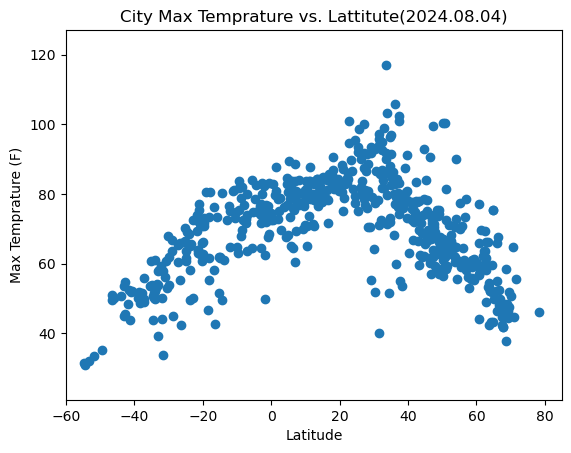

In [39]:
# Build scatter plot for latitude vs. temperature
City_scatter=plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
# YOUR CODE HERE x_lims=
y_max=city_data_df["Max Temp"].max()+10
y_min=city_data_df["Max Temp"].min()-10
plt.xlim(-60,85)
plt.ylim(y_min,y_max)
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (F)")
plt.title("City Max Temprature vs. Lattitute(2024.08.04)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

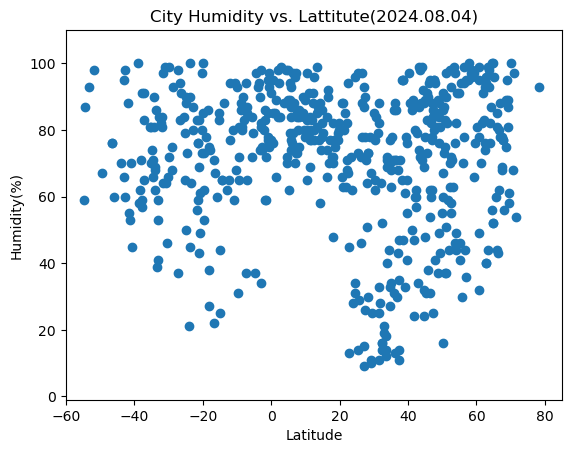

In [40]:
# Build the scatter plots for latitude vs. humidity
City_scatter_humidity=plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])


# Incorporate the other graph properties
y_max=city_data_df["Humidity"].max()+10
y_min=city_data_df["Humidity"].min()-10
plt.xlim(-60,85)
plt.ylim(y_min,y_max)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Humidity vs. Lattitute(2024.08.04)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

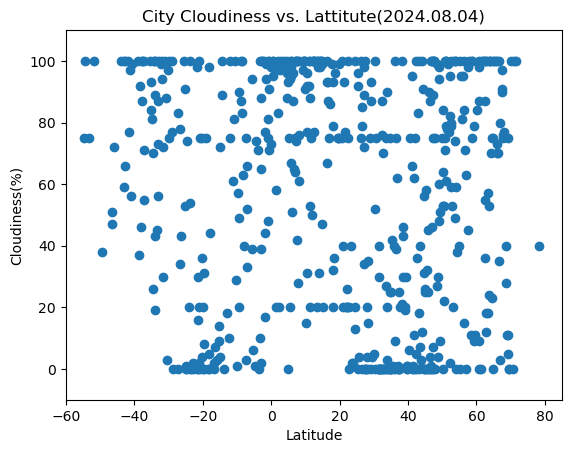

In [41]:
# Build the scatter plots for latitude vs. cloudiness
City_scatter_Cloudiness=plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])


# Incorporate the other graph properties
y_max=city_data_df["Cloudiness"].max()+10
y_min=city_data_df["Cloudiness"].min()-10
plt.xlim(-60,85)
plt.ylim(y_min,y_max)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Cloudiness vs. Lattitute(2024.08.04)")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

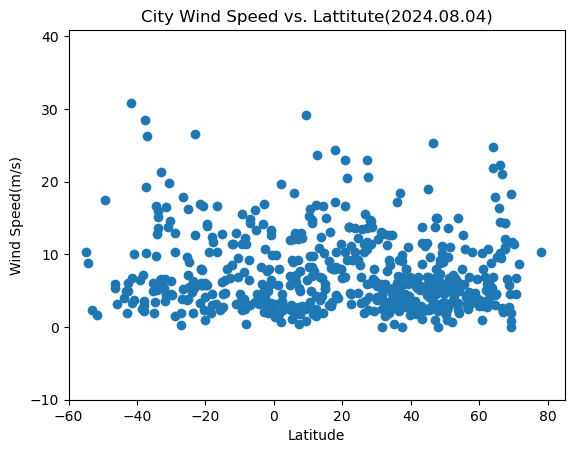

In [42]:
# Build the scatter plots for latitude vs. wind speed
City_scatter_wind=plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])


# Incorporate the other graph properties
y_max=city_data_df["Wind Speed"].max()+10
y_min=city_data_df["Wind Speed"].min()-10
plt.xlim(-60,85)
plt.ylim(y_min,y_max)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.title("City Wind Speed vs. Lattitute(2024.08.04)")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots


In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,georgetown,5.4112,100.3354,78.73,89,20,1.14,MY,1722816520
3,bethel,41.3712,-73.4140,75.60,88,0,5.75,US,1722816524
4,kodiak,57.7900,-152.4072,53.11,100,100,10.36,US,1722816526
5,isafjordur,66.0755,-23.1240,46.31,85,73,14.47,IS,1722816527
7,egilsstadir,65.2653,-14.3948,49.98,96,100,9.69,IS,1722816530


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"]<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,codrington,-38.2667,141.9667,48.87,62,92,7.20,AU,1722816521
2,bredasdorp,-34.5322,20.0403,44.01,71,26,9.78,ZA,1722816523
6,coquimbo,-29.9533,-71.3436,53.98,72,75,4.61,CL,1722816528
8,port saint john's,-31.6229,29.5448,57.99,64,72,16.53,ZA,1722816531
10,luwuk,-0.9516,122.7875,76.55,77,81,6.53,ID,1722816533


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is:0.3762109572139861


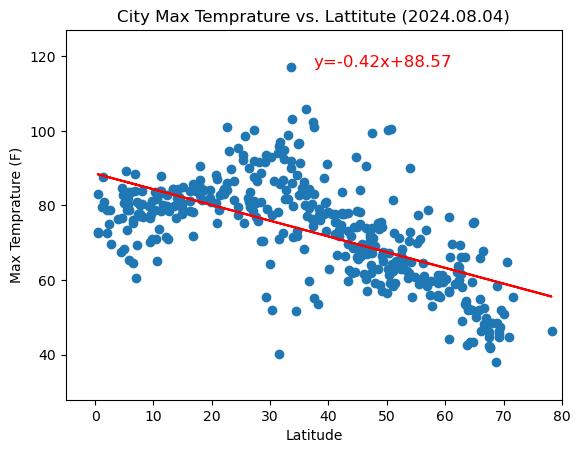

In [68]:
# Linear regression on Northern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
rgressvalue=northern_hemi_df["Lat"]*slope+intercept
plt.plot(northern_hemi_df["Lat"],rgressvalue,"r-")
r_squere=rvalue**2
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
y_max=northern_hemi_df["Max Temp"].max()+10
y_min=northern_hemi_df["Max Temp"].min()-10
plt.xlim(-5,80)
plt.ylim(y_min,y_max)
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (F)")
plt.title("City Max Temprature vs. Lattitute (2024.08.04)")
City_scatter=plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
print(f"The r^2-value is:{r_squere}")

plt.annotate(line_eq, xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, color='red')

plt.show()



The r^2-value is:0.6245497509140329


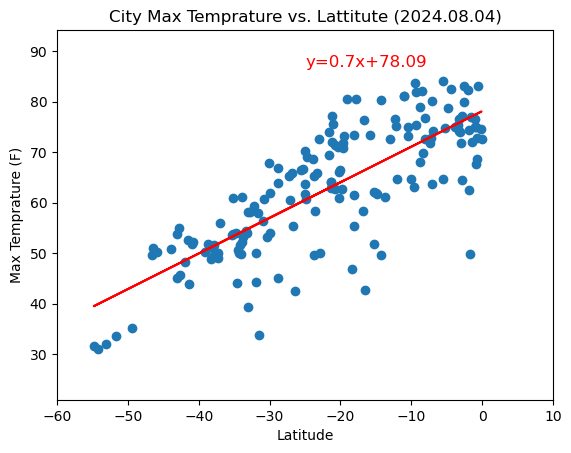

In [69]:
# Linear regression on Southern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
rgressvalue=southern_hemi_df["Lat"]*slope+intercept
plt.plot(southern_hemi_df["Lat"],rgressvalue,"r-")
r_squere=rvalue**2
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
y_max=southern_hemi_df["Max Temp"].max()+10
y_min=southern_hemi_df["Max Temp"].min()-10
plt.xlim(-60,10)
plt.ylim(y_min,y_max)
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (F)")
plt.title("City Max Temprature vs. Lattitute (2024.08.04)")
City_scatter=plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.annotate(line_eq, xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, color='red')
print(f"The r^2-value is:{r_squere}")


plt.show()

**Discussion about the linear relationship:** 
The slope of the regression line indicates the rate of change in temperature with respect to latitude. A negative slope in Northern Hemisphere suggests that temperature decreases as latitude increases, which is expected as you move away from the equator. 
A positive slope in  Southern Hemisphere suggests that temperature increases as latitude increases, which is expected as you go colser toward the equator. 


### Humidity vs. Latitude Linear Regression Plot

The r^2-value is:0.003101307509500096


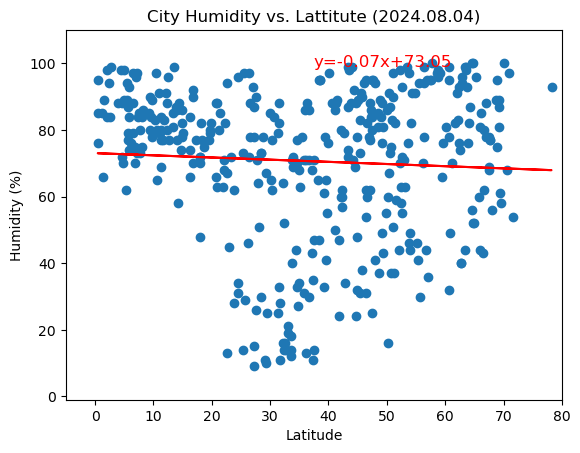

In [80]:
# Northern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
rgressvalue=northern_hemi_df["Lat"]*slope+intercept
plt.plot(northern_hemi_df["Lat"],rgressvalue,"r-")
r_squere=rvalue**2
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
y_max=northern_hemi_df["Humidity"].max()+10
y_min=northern_hemi_df["Humidity"].min()-10
plt.xlim(-5,80)
plt.ylim(y_min,y_max)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Humidity vs. Lattitute (2024.08.04)")
City_scatter=plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
print(f"The r^2-value is:{r_squere}")

plt.annotate(line_eq, xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, color='red')

plt.show()


The r^2-value is:0.004556715929007306


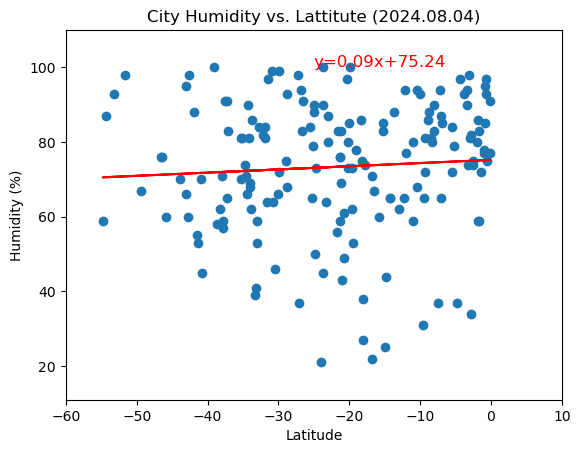

In [73]:
# Southern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
rgressvalue=southern_hemi_df["Lat"]*slope+intercept
plt.plot(southern_hemi_df["Lat"],rgressvalue,"r-")
r_squere=rvalue**2
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
y_max=southern_hemi_df["Humidity"].max()+10
y_min=southern_hemi_df["Humidity"].min()-10
plt.xlim(-60,10)
plt.ylim(y_min,y_max)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Humidity vs. Lattitute (2024.08.04)")
City_scatter=plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.annotate(line_eq, xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, color='red')
print(f"The r^2-value is:{r_squere}")


plt.show()

**Discussion about the linear relationship:** 
The equator generally experiences higher humidity year-round, including during this time of year (August).
In the summer, regions at higher latitudes may experience relatively high humidity due to warmer temperatures and increased evaporation in northern hemisphere. The Southern Hemisphere has a higher proportion of oceanic area compared to land, which can lead to different humidity patterns.Based on these patterns linear relationship is not a good way to show the relation between humidity and laltitude as you can see points are not following a specific trend.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is:0.02015110025667393


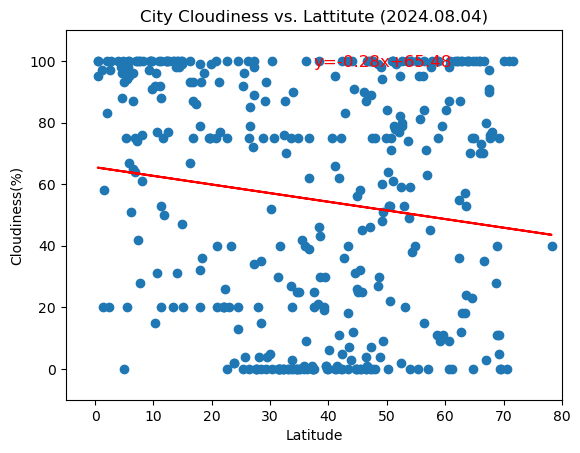

In [75]:
# Northern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
rgressvalue=northern_hemi_df["Lat"]*slope+intercept
plt.plot(northern_hemi_df["Lat"],rgressvalue,"r-")
r_squere=rvalue**2
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
y_max=northern_hemi_df["Cloudiness"].max()+10
y_min=northern_hemi_df["Cloudiness"].min()-10
plt.xlim(-5,80)
plt.ylim(y_min,y_max)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Cloudiness vs. Lattitute (2024.08.04)")
City_scatter=plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
print(f"The r^2-value is:{r_squere}")

plt.annotate(line_eq, xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, color='red')

plt.show()

The r^2-value is:0.028987453842558145


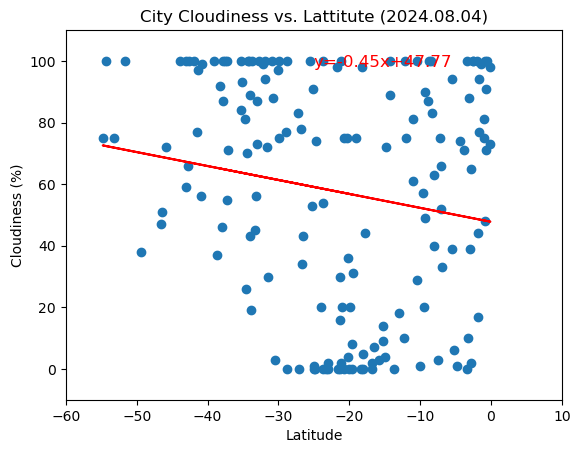

In [76]:
# Southern Hemisphere 
(slope,intercept,rvalue,pvalue,stderr)=linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
rgressvalue=southern_hemi_df["Lat"]*slope+intercept
plt.plot(southern_hemi_df["Lat"],rgressvalue,"r-")
r_squere=rvalue**2
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
y_max=southern_hemi_df["Cloudiness"].max()+10
y_min=southern_hemi_df["Cloudiness"].min()-10
plt.xlim(-60,10)
plt.ylim(y_min,y_max)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Cloudiness vs. Lattitute (2024.08.04)")
City_scatter=plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.annotate(line_eq, xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, color='red')
print(f"The r^2-value is:{r_squere}")


plt.show()

**Discussion about the linear relationship:** The resulting points for both hemispheres show considerable variation and do not reveal any discernible trend between cloudiness and latitude. Consequently, the linear regression line does not fit the scatter data well, as evidenced by the R-squared value, which is close to zero.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is:0.005284818029049634


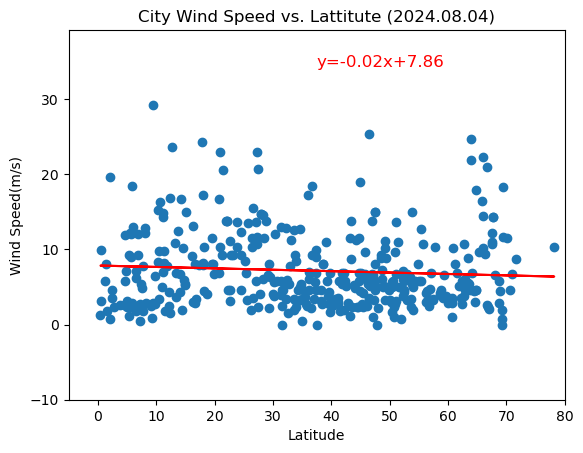

In [77]:
# Northern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
rgressvalue=northern_hemi_df["Lat"]*slope+intercept
plt.plot(northern_hemi_df["Lat"],rgressvalue,"r-")
r_squere=rvalue**2
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
y_max=northern_hemi_df["Wind Speed"].max()+10
y_min=northern_hemi_df["Wind Speed"].min()-10
plt.xlim(-5,80)
plt.ylim(y_min,y_max)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.title("City Wind Speed vs. Lattitute (2024.08.04)")
City_scatter=plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
print(f"The r^2-value is:{r_squere}")

plt.annotate(line_eq, xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, color='red')

plt.show()

The r^2-value is:0.008957392628704056


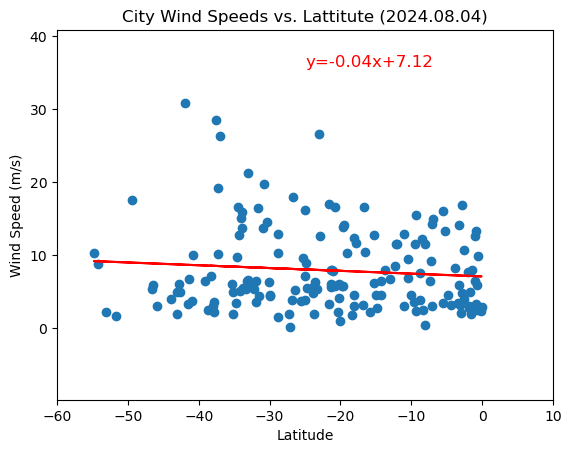

In [79]:
# Southern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
rgressvalue=southern_hemi_df["Lat"]*slope+intercept
plt.plot(southern_hemi_df["Lat"],rgressvalue,"r-")
r_squere=rvalue**2
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
y_max=southern_hemi_df["Wind Speed"].max()+10
y_min=southern_hemi_df["Wind Speed"].min()-10
plt.xlim(-60,10)
plt.ylim(y_min,y_max)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Wind Speeds vs. Lattitute (2024.08.04)")
City_scatter=plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.annotate(line_eq, xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, color='red')
print(f"The r^2-value is:{r_squere}")


plt.show()

**Discussion about the linear relationship:** Wind speed against latitude shows that values are consistently around 10 m/s for both hemispheres. This suggests that if we exclude some outlier scatter points, most regions exhibit wind speeds fluctuating between 0 to 20 m/s. Consequently, the linear regression line appears relatively straight and does not capture the fluctuations in wind speed effectively. This lack of fit is clearly indicated by the R-squared value, which is close to zero, reflecting the poor correlation between wind speed and latitude.